In [158]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [159]:
#Reading the file
df=pd.read_csv('Results_MADE.csv')
df.head()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
0,7.5,9.95,7.85,0.15,90.0,0.255,22.5,180.0,134.5,27.143963
1,11.0,9.65,7.70,0.45,205.0,0.200,62.5,410.0,77.0,15.780001
2,7.5,9.90,7.65,0.55,100.0,0.100,26.0,200.0,101.5,20.612438
3,8.5,9.65,7.55,0.35,300.0,0.250,97.5,600.0,148.0,29.820475
4,10.0,9.55,7.80,0.25,190.0,0.150,47.5,380.0,106.0,21.498569


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        295 non-null    float64
 1   Dissolved Oxygen                   295 non-null    float64
 2   pH                                 295 non-null    float64
 3   Bio-Chemical Oxygen Demand (mg/L)  295 non-null    float64
 4   Faecal Streptococci (MPN/ 100 mL)  295 non-null    float64
 5   Nitrate (mg/ L)                    295 non-null    float64
 6   Faecal Coliform (MPN/ 100 mL)      295 non-null    float64
 7   Total Coliform (MPN/ 100 mL)       295 non-null    float64
 8   Conductivity (mho/ Cm)             295 non-null    float64
 9   WQI                                295 non-null    float64
dtypes: float64(10)
memory usage: 23.2 KB


In [161]:
df.describe()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,20.903898,7.342034,7.754627,3.544136,7463.333729,0.870915,5983.661695,14926.667458,501.860678,100.889437
std,6.051566,1.910113,0.378879,9.043299,26272.135186,1.431247,22934.986514,52544.270371,798.311280,158.115301
min,0.000000,0.000000,5.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524595
25%,18.000000,6.850000,7.550000,0.725000,29.225000,0.155000,4.000000,58.450000,208.250000,42.010910
50%,22.500000,7.750000,7.750000,1.600000,240.000000,0.550000,79.500000,480.000000,299.500000,60.379172
75%,25.550000,8.600000,8.000000,3.100000,2650.000000,0.950000,2375.000000,5300.000000,438.250000,90.120883
max,30.500000,10.250000,8.600000,123.500000,229000.000000,14.050000,251000.000000,458000.000000,9272.000000,1834.549110


In [162]:
#Creating X & y variables
X=df[['Temperature','Dissolved Oxygen','pH','Bio-Chemical Oxygen Demand (mg/L)','Faecal Streptococci (MPN/ 100 mL)','Nitrate (mg/ L)','Faecal Coliform (MPN/ 100 mL)','Total Coliform (MPN/ 100 mL)','Conductivity (mho/ Cm)']]
y=df['WQI']

In [163]:
X.head()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm)
0,7.5,9.95,7.85,0.15,90.0,0.255,22.5,180.0,134.5
1,11.0,9.65,7.70,0.45,205.0,0.200,62.5,410.0,77.0
2,7.5,9.90,7.65,0.55,100.0,0.100,26.0,200.0,101.5
3,8.5,9.65,7.55,0.35,300.0,0.250,97.5,600.0,148.0
4,10.0,9.55,7.80,0.25,190.0,0.150,47.5,380.0,106.0


In [164]:
y.head()

0    27.143963
1    15.780001
2    20.612438
3    29.820475
4    21.498569
Name: WQI, dtype: float64

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.20)

In [166]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_train=pd.DataFrame(X_train)

In [167]:
X_train.head()

,0,1,2,3,4,5,6,7,8
0,-1.515054,0.602300,-0.151977,-0.293246,-0.261648,-0.058410,-0.273598,-0.261648,0.941230
1,0.538289,-0.203194,0.653111,0.097389,0.662234,-0.585346,1.123784,0.662234,-0.213084
2,0.579356,0.441201,1.458199,-0.092789,-0.227983,-0.100565,-0.219646,-0.227983,-0.122216
3,-1.597188,0.763398,-0.688703,-0.344645,-0.268913,-0.585346,-0.276183,-0.268913,-0.419442
4,-1.638255,0.333802,0.384748,-0.252126,-0.268913,-0.585346,-0.276183,-0.268913,-0.233017


In [168]:
y_train=y_train.reset_index(drop=True)
y_train.head()

0    261.084682
1     70.407994
2     81.942194
3     31.436803
4     62.912114
Name: WQI, dtype: float64

In [169]:
X_train.iloc[:,0].head()

0   -1.515054
1    0.538289
2    0.579356
3   -1.597188
4   -1.638255
Name: 0, dtype: float64

In [170]:
df_2=pd.DataFrame()
df_2['Coln']=X_train.iloc[:,0]
df_2['WQI']=y_train[0:]
df_2.head()

,Coln,WQI
0,-1.515054,261.084682
1,0.538289,70.407994
2,0.579356,81.942194
3,-1.597188,31.436803
4,-1.638255,62.912114


Applying ANN for Regression

In [171]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [172]:
#ANN
ann=tf.keras.models.Sequential()
ann

In [173]:
#Adding layer (Input)
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [174]:
#Adding layer (1st hidden layer)
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [175]:
#Adding layer (Output)
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [176]:
opt=SGD(lr=0.01,momentum=0.9)

C:\Users\Chinmay\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [177]:
#Stochastic Gradient Descent
ann.compile(optimizer=opt,loss='mean_absolute_error',metrics=['mse'])

In [178]:
#Training the model
history=ann.fit(X_train,y_train,batch_size=32,epochs=100,verbose=0)

In [179]:
y_pred=ann.predict(sc.transform(X_test))

In [180]:
history.history.keys()

dict_keys(['loss', 'mse'])

In [181]:
_,train_mse=ann.evaluate(X_train,y_train,verbose=0)

In [182]:
_,test_mse=ann.evaluate(X_test,y_test,verbose=0)

In [183]:
print('Train MSE: '+str(train_mse)+' Test MSE: '+str(test_mse))

Train MSE: 1815.3131103515625 Test MSE: 104045871104.0


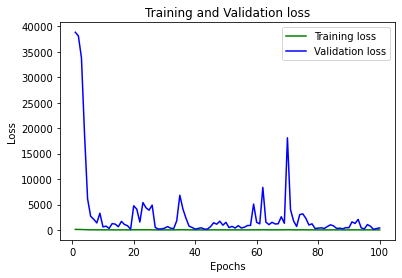

In [184]:
loss_train=history.history['loss']
loss_val=history.history['mse']
epochs=range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

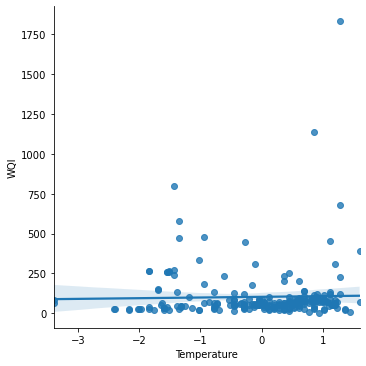

In [188]:
# plt.scatter(X_train.iloc[:,0],y_train)
sns.lmplot(x='Coln',y='WQI',data=df_2)
plt.xlabel('Temperature')
plt.ylabel('WQI')
plt.show()

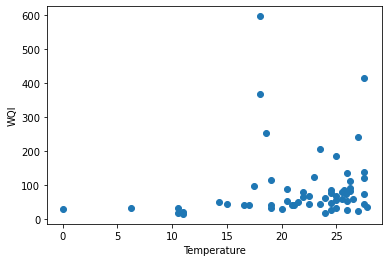

In [190]:
plt.scatter(X_test.iloc[:,0],y_test)
# sns.lmplot(x='Coln',y='WQI',data=df_2)
plt.xlabel('Temperature')
plt.ylabel('WQI')
plt.show()